### Implement Linear Regression and Logistic Regression
<img src="pics/bridge-2.jpg" width="800" height="400">
In this article you're going to learn about Linear Regression, Logistic Regression and Gradient Descent algorithm which is a essential component of deep learning.

### Agenda
1. How does it work?
2. Gradient Descent
3. Learning Rate
3. Implement Linear Regression on quantitative data
4. Implement Logistic Regression on qualitative data

### 1. How does it work?
Unlike KNN which needs to store whole training samples in order to predict output of unseen samples, Linear Regression and Logistic Regression do not store a single point of training sample but instead they create a linear function to approximate the training set. Below are brief procedures of how to train both of them using **Gradient Descent** (actually there is another method called **Least Square Error** but we're not going to talk about it in this course).

<img src="pics/linear_regression-2.png" width="1000">

```
1. Initial the model with random parameters
2. for _ in range(epochs):
3.    Predict output for training samples from the linear function
4.    Calculate cost from prediction outputs and training labels
5.    Update parameters by Gradient descent
```

<img src="pics/linear_regression_animation.gif">

There are several differents between Linear Regression and Logistic Regression.
1. Linear Regression outputs **continuous quantity**, Logistic Regression outputs **probability**.
2. Linear Regression uses **Mean Squared Error** or **Mean Absolute Error** as cost function, Logistic Regression uses **Binary Cross Entropy** as cost function.

In short, the obvious different between the two is that Linear Regression is for **quantitative data** and another is for **qualitative data**. the following will show how both of them work in greater detail.

### 1.1. Linear Regression
Linear Regression's equation is a simple linear function that map from N independent variables to a dependent variable.
- Simple Linear Regression
#### $$\hat{y} = w_0 + wx$$
- Multiple Linear Regression
#### $$\hat{y} = w_0 + w_1x_1 + w_2x_2 + w_nx_n$$
- Polynomial Linear Regression
#### $$\hat{y} = w_0 + w_1x_1 + w_2x_2 + w_3x_1x_2 + w_4x_1^2 + w_5x_2^2 + w_nx_n$$

<img src="pics/linear_regression-3.png" width="800" height="200">

In order for Gradient Descent algorithm to be able to train the model we need a cost function for optimizer to minimize it.
- Mean Squared Error (MSE)
#### $$MSE = \frac{1}{n}\sum_{i=1}^n{(y_i - \hat{y}_i)^2}$$

<img src="pics/MSE.png">

- Mean Absolute Error (MAE)
#### $$MAE = \frac{1}{n}\sum_{i=1}^n{|y_i - \hat{y}_i|}$$

<img src="pics/MAE.png">

### 1.2. Logistic Regression
Logistic Regression is a linear equation mapping any N independent variables into one dependent variable that is a **qualitative data**.
- Simple Logistic Regression
#### $$\hat{y} = \frac{1}{1 + e^{-z}},\quad z = w_0 + wx$$
- Multiple Logistic Regression
#### $$\hat{y} = \frac{1}{1 + e^{-z}},\quad z = w_0 + w_1x_1 + w_2x_2 + w_nx_n$$
- Polynomial Logistic Regression
#### $$\hat{y} = \frac{1}{1 + e^{-z}},\quad z = w_0 + w_1x_1 + w_2x_2 + w_3x_1x_2 + w_4x_1^2 + w_5x_2^2 + w_nx_n$$

<img src="pics/logistic_regression-3.png" width="1400" height="200">

Since output of Logistic Regression is probability so it need different type of cost function.
- Binary Cross Entropy (BCE)
####  $$BCE = \frac{1}{n}\sum_{i=1}^n{(-y_i*log(\hat{y}_i) - (1 - y_i)*log(1 - \hat{y}_i))}$$

<img src="pics/BCE.png">

### 2. Gradient Descent
Gradient descent is an optimization algorithm used in machine learning to update model's parameters to the optimal point by minimizing some function by moving iteratively in the steepest descent direction as defined by the negative of the gradient.
- Gradient Descent Equation
#### $$W_{new} = W_{old} - \alpha*\frac{\partial J(W)}{\partial W}$$
When  
$J(W)$: Cost function  
$W$: Model parameters  
$\alpha$: Learning rate

<img src="pics/GradientDescent.png" width="500">

From the figure above the model with initialized parameters start at the **inital point**, then in each epoch the model finds which direction to update each parameter to move closer to the **optimal point** by calculating partial derivative of the cost function with respect to each parameter, and update its parameters by subtraction current value of each parameter with the derivative times learning rate.

- Calculating derivative for LinearRegression
#### $$J(w_0, w_1) = \frac{1}{n}\sum_{i=1}^n{(y_i - \hat{y}_i)^2},\quad \hat{y} = w_0 + w_1x$$
#### $$\frac{\partial J(w_0, w_1)}{\partial w_0} = \frac{1}{n}\sum_{i=1}^n{\frac{\partial J(w_0, w_1)}{\partial \hat{y}} \times \frac{\partial \hat{y}}{\partial w_0}} = \frac{1}{n}\sum_{i=1}^n{-2(y_i - \hat{y}_i) \times 1}$$
#### $$\frac{\partial J(w_0, w_1)}{\partial w_1} = \frac{1}{n}\sum_{i=1}^n{\frac{\partial J(w_0, w_1)}{\partial \hat{y}} \times \frac{\partial \hat{y}}{\partial w_1}} = \frac{1}{n}\sum_{i=1}^n{-2(y_i - \hat{y}_i) \times x}$$

- Calculating derivative for LogisticRegression
#### $$J(w_0, w_1) = \frac{1}{n}\sum_{i=1}^n{(-y_i*log(\hat{y}_i) - (1 - y_i)*log(1 - \hat{y}_i))},\quad \hat{y} = \frac{1}{1 + e^{-z}},\quad z = w_0 + wx$$
#### $$\frac{\partial J(w_0, w_1)}{\partial w_0} = \frac{1}{n}\sum_{i=1}^n{\frac{\partial J(w_0, w_1)}{\partial \hat{y}} \times \frac{\partial \hat{y}}{\partial z} \times \frac{\partial z}{\partial w_0}} = \frac{1}{n}\sum_{i=1}^n{\left(-\frac{y_i}{\hat{y}_i} + \frac{1-y_i}{1-\hat{y}_i}\right) \times \hat{y}_i(1 - \hat{y}_i) \times 1}$$
#### $$\frac{\partial J(w_0, w_1)}{\partial w_1} = \frac{1}{n}\sum_{i=1}^n{\frac{\partial J(w_0, w_1)}{\partial \hat{y}} \times \frac{\partial \hat{y}}{\partial z} \times \frac{\partial z}{\partial w_1}} = \frac{1}{n}\sum_{i=1}^n{\left(-\frac{y_i}{\hat{y}_i} + \frac{1-y_i}{1-\hat{y}_i}\right) \times \hat{y}_i(1 - \hat{y}_i) \times x}$$

### 3. Learning Rate
Learning rate is one of hyperparameters which used to determine how much to update parameters, too small learning rate leads to slow in training time and too big learning rate leads to oscillation or divergence.

<img src="pics/LearningRate.png" width="1000">

### 4. Implement Linear regression on quantitative data
This time we're going to use Linear Regression to predict house price instead of KNN, let see if Linear Regression can do any better than the KNN.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 4.1. Load dataset

In [2]:
# Load dataset
house_data = pd.read_csv("./datasets/housedata/data.csv")

### 4.2. Prepare data

In [3]:
# Remove columns
data = house_data.drop(columns=["date", "yr_built", "yr_renovated", "street", "statezip", "country"])
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond


In [4]:
# One-hot encoding categorical columns
categorical_cols = ["view", "condition", "city"]

for col in categorical_cols:
    city_encoded = pd.get_dummies(data[col])
    city_encoded.columns = [col + "_" + str(_col) for _col in city_encoded.columns]
    data = pd.concat([data.drop(columns=col), city_encoded], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,view_0,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3.0,1.50,1340,7912,1.5,0,1340,0,1,...,0,0,1,0,0,0,0,0,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,3370,280,0,...,0,1,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,1930,0,1,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,1000,1000,1,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,1140,800,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Seperate prediction/feature
data_x = data.drop(columns="price")
data_y = data.price
print(f"data_x: {data_x.shape}")
print(f"data_y: {data_y.shape}")

data_x: (4600, 62)
data_y: (4600,)


In [6]:
from sklearn.model_selection import train_test_split

train_x: (3680, 62)
test_x: (920, 62)
train_y: (3680,)
test_y: (920,)


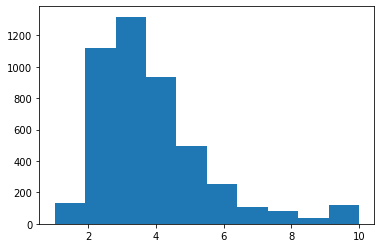

In [7]:
# Split train/test
# Group y into bins
bins = np.linspace(0, 1500000, 10)
y_binned = np.digitize(data_y, bins)
plt.hist(y_binned)

# Split with stratify
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42, shuffle=True, stratify=y_binned)
print(f"train_x: {train_x.shape}")
print(f"test_x: {test_x.shape}")
print(f"train_y: {train_y.shape}")
print(f"test_y: {test_y.shape}")

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
# Normalize all features to be in range [0, 1] for training set
scaler_x = StandardScaler()

scaler_x.fit(train_x)

train_x_scaled = scaler_x.transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=train_x.columns)
train_x_scaled.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,view_0,view_1,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
count,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,...,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03
mean,-1.073115e-16,3.722867e-17,1.099513e-16,6.174107e-17,-1.614349e-16,-5.539349e-16,1.601979e-17,-1.844539e-16,-1.740606e-16,4.121929e-16,...,1.204728e-16,-1.450531e-16,-2.180019e-16,-2.796129e-16,-4.686921e-16,5.629574e-16,4.476492e-16,1.993303e-15,1.267102e-16,-2.331525e-16
std,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,...,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00
min,-3.732891e+00,-2.747640e+00,-1.827296e+00,-4.225101e-01,-9.559976e-01,-8.102192e-02,-1.686014e+00,-6.692456e-01,-2.990977e+00,-1.197204e-01,...,-8.597200e-02,-7.272373e-01,-1.627861e-01,-2.331896e-02,-1.287423e-01,-1.648675e-02,-8.270396e-02,-8.102192e-02,-1.645366e-01,-2.331896e-02
25%,-4.375834e-01,-5.225785e-01,-6.964308e-01,-2.898747e-01,-9.559976e-01,-8.102192e-02,-7.330443e-01,-6.692456e-01,3.343389e-01,-1.197204e-01,...,-8.597200e-02,-7.272373e-01,-1.627861e-01,-2.331896e-02,-1.287423e-01,-1.648675e-02,-8.270396e-02,-8.102192e-02,-1.645366e-01,-2.331896e-02
50%,-4.375834e-01,1.131534e-01,-1.673104e-01,-2.092657e-01,-3.286163e-02,-8.102192e-02,-2.798025e-01,-6.692456e-01,3.343389e-01,-1.197204e-01,...,-8.597200e-02,-7.272373e-01,-1.627861e-01,-2.331896e-02,-1.287423e-01,-1.648675e-02,-8.270396e-02,-8.102192e-02,-1.645366e-01,-2.331896e-02
75%,6.608524e-01,4.310193e-01,4.966839e-01,-1.094699e-01,8.902743e-01,-8.102192e-02,5.453298e-01,6.239690e-01,3.343389e-01,-1.197204e-01,...,-8.597200e-02,1.375067e+00,-1.627861e-01,-2.331896e-02,-1.287423e-01,-1.648675e-02,-8.270396e-02,-8.102192e-02,-1.645366e-01,-2.331896e-02
max,6.153032e+00,7.424070e+00,1.183646e+01,1.905516e+01,3.659682e+00,1.234234e+01,8.819897e+00,9.719578e+00,3.343389e-01,8.352798e+00,...,1.163169e+01,1.375067e+00,6.143032e+00,4.288356e+01,7.767453e+00,6.065476e+01,1.209132e+01,1.234234e+01,6.077676e+00,4.288356e+01


In [10]:
# Normalize all features to be in range [0, 1] for test set
test_x_scaled = scaler_x.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=test_x.columns)
test_x_scaled.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,view_0,view_1,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,...,920.000000,920.000000,920.000000,920.000000,920.000000,9.200000e+02,920.000000,920.000000,920.000000,920.000000
mean,0.013730,-0.001209,0.041928,0.048555,-0.052930,0.040511,0.037795,0.017009,0.009036,0.036837,...,-0.060499,-0.041703,0.029130,0.023319,-0.034331,-1.648675e-02,-0.029773,-0.013504,-0.042406,0.069957
std,0.991444,0.982609,0.995879,1.397089,0.967554,1.223398,1.009287,1.001793,0.988420,1.141640,...,0.546042,0.986053,1.083805,1.414598,0.858706,2.291080e-16,0.801420,0.913867,0.865020,1.999455
min,-3.732891,-2.747640,-1.671672,-0.421203,-0.955998,-0.081022,-1.511690,-0.669246,-2.990977,-0.119720,...,-0.085972,-0.727237,-0.162786,-0.023319,-0.128742,-1.648675e-02,-0.082704,-0.081022,-0.164537,-0.023319
25%,-0.437583,-0.522579,-0.665306,-0.277712,-0.955998,-0.081022,-0.735950,-0.669246,0.334339,-0.119720,...,-0.085972,-0.727237,-0.162786,-0.023319,-0.128742,-1.648675e-02,-0.082704,-0.081022,-0.164537,-0.023319
50%,-0.437583,0.113153,-0.130998,-0.206088,-0.032862,-0.081022,-0.221695,-0.669246,0.334339,-0.119720,...,-0.085972,-0.727237,-0.162786,-0.023319,-0.128742,-1.648675e-02,-0.082704,-0.081022,-0.164537,-0.023319
75%,0.660852,0.431019,0.548558,-0.100241,0.890274,-0.081022,0.615059,0.688630,0.334339,-0.119720,...,-0.085972,1.375067,-0.162786,-0.023319,-0.128742,-1.648675e-02,-0.082704,-0.081022,-0.164537,-0.023319
max,3.956160,4.245411,5.030520,32.221854,2.736546,12.342339,4.078291,4.029434,0.334339,8.352798,...,11.631694,1.375067,6.143032,42.883563,7.767453,-1.648675e-02,12.091319,12.342339,6.077676,42.883563


In [11]:
# Convert type to numpy array
train_x_scaled = train_x_scaled.to_numpy()
train_x, train_y = train_x.to_numpy(), train_y.to_numpy()

test_x_scaled = test_x_scaled.to_numpy()
test_x, test_y = test_x.to_numpy(), test_y.to_numpy()

### 4.3. Prepare model
Let's implement the following Linear Regression with features size of 4 in matrix form.
#### $$\hat{y} = w_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4$$

We can write it in matrix form as the following.
#### $$\hat{Y} = X^TW =
\begin{bmatrix}
1 & x_1 & x_2 & x_3 & x_4
\end{bmatrix}
\begin{bmatrix}
w_0 \\
w_1 \\
w_2 \\
w_3 \\
w_4 \\
\end{bmatrix}
$$

However, inputs to the model can be more than one sample at a time as shown below.
#### $$\hat{y}_1 = w_0 + w_1x_{11} + w_2x_{12} + w_3x_{13} + w_4x_{14}$$
#### $$\hat{y}_2 = w_0 + w_1x_{21} + w_2x_{22} + w_3x_{23} + w_4x_{24}$$
#### $$\hat{y}_3 = w_0 + w_1x_{31} + w_2x_{32} + w_3x_{33} + w_4x_{34}$$

And we can write it in matrix form as following.
#### $$\hat{Y} = X^TW =
\begin{bmatrix}
1 & x_{11} & x_{12} & x_{13} & x_{14} \\
1 & x_{21} & x_{22} & x_{23} & x_{24} \\
1 & x_{31} & x_{32} & x_{33} & x_{34} \\
\end{bmatrix}
\begin{bmatrix}
w_0 \\
w_1 \\
w_2 \\
w_3 \\
w_4 \\
\end{bmatrix}
$$

Now you can see that, what you have to do to implement Linear Regression in matrix form are:
1. Initial weight vector with size equal to feature numbers of input + 1.
2. Concatenate vector of one to every batch of input with the vector size equal to batch size.
3. Do matrix multiplication between inputs and the weights.

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Model

In [13]:
class LinearLayer(layers.Layer):
    def build(self, input_shape):
        # w shape: (feature_size, 1)
        self.w = self.add_weight(name="W",
                                 shape=(input_shape[-1] + 1, 1),
                                 initializer=tf.random_normal_initializer(),
                                 dtype="float32")
        
    def get_config(self):
        config = super().get_config()
        config.update({'w': self.w})
        return config
    
    def call(self, inp):
        """
        inp shape: (batch_size, feature_size)
        out shape: (batch_size, 1)
        """
        # Cast input type
        inp = tf.cast(inp, tf.float32)
        
        # Concatenate one vector to input
        bias = tf.ones(shape=(tf.shape(inp)[0], 1), dtype=inp.dtype)
        inp = tf.concat([bias, inp], axis=1)
        
        # Linear operation
        out = tf.matmul(inp, self.w)
        return out
    
class LinearRegression(Model):
    def __init__(self):
        super().__init__()
        self.linear_layer = LinearLayer()
        
    def call(self, inp):
        out = self.linear_layer(inp)
        return out

In [14]:
dummy_x = np.arange(1000).astype(np.float32).reshape(-1, 1)
dummy_y = (dummy_x * 230 + 1).astype(np.float32).reshape(-1, 1) + np.random.normal(0, 1, size=(1000, 1)).astype(np.float32) * 0

regression_model = LinearRegression()

y_pred = regression_model(dummy_x)
print(f"Output shape: {y_pred.shape}")
print(f"Parameters:\n{regression_model.trainable_variables[0].numpy()}")

Output shape: (1000, 1)
Parameters:
[[0.15693742]
 [0.04215328]]


### 4.4. Fit and evaluate model
There are two important steps for training model.
1. Forward propagation
2. Calculate derivatives of loss function with respect to each of model parameter (calculate gradient)
3. Update model parameters using the prior derivatives

Actually, Tensorflow provides both **High-level API** and **Low-level API** for training model so that you don't have to write code to calculate derivatives and update parameters by yourself, but to understand what going on under the api let's try to implement a code to calculate derivatives for the following simple linear model with 2 parameters by yourself.
- Simple linear model with 2 parameters
#### $$\hat{y} = w_0 + w_1x_1$$
- Loss function
#### $$J(w_0, w_1) = \frac{1}{n}\sum_{i=0}^n{(y_i - \hat{y}_i)^2}$$
- Equations for calculating derivative of the loss function with respect to each parameter
#### $$\frac{\partial J(w_0, w_1)}{\partial w_0} = \frac{1}{n}\sum_{i=1}^n{\frac{\partial J(w_0, w_1)}{\partial \hat{y}} \times \frac{\partial \hat{y}}{\partial w_0}} = \frac{1}{n}\sum_{i=1}^n{-2(y_i - \hat{y}_i) \times 1}$$
#### $$\frac{\partial J(w_0, w_1)}{\partial w_1} = \frac{1}{n}\sum_{i=1}^n{\frac{\partial J(w_0, w_1)}{\partial \hat{y}} \times \frac{\partial \hat{y}}{\partial w_1}} = \frac{1}{n}\sum_{i=1}^n{-2(y_i - \hat{y}_i) \times x}$$

In [69]:
def ex_derivative(model, loss_func, x, y):
    """
    Tensorflow is able to calculate gradient by tracking computational graph of input, therefore, we need to calculate loss so that it can calculate the derivative
    of the loss with respect to each parameter which the input flowed through.
    """
    with tf.GradientTape() as g:
        # Forward propagation
        y_pred = model(x)
        
        # Calculate loss
        loss = loss_func(y, y_pred)
        
    # Calculate gradient (vector of directional derivative)
    grads = g.gradient(loss, model.trainable_variables)
    d_w0, d_w1 = grads[0].numpy()
    return np.squeeze(d_w0), np.squeeze(d_w1)

def derivative(model, x, y):
    """
    Because we already know the loss function, we can calculate the derivative directly without having to calculate the loss first like in Tensorflow example above.
    """
    # Forward propagation
    y_pred = regression_model.predict(dummy_x)
    
    # Calculate derivative for each parameter
    error = dummy_y - y_pred
    d_w0 = np.mean(-2 * error, axis=0)
    d_w1 = np.mean(-2 * error * dummy_x, axis=0)
    return d_w0, d_w1

In [71]:
# Initial x, y
dummy_x = np.random.randint(0, 100, size=(10, 1))
dummy_y = np.random.randint(0, 100, size=(10, 1))

# Create model
regression_model = LinearRegression()

# Calculate derivatives using Tensorflow
tf_d_w0, tf_d_w1 = ex_derivative(regression_model, tf.keras.losses.MeanSquaredError(), dummy_x, dummy_y)
print("Using Tensorflow")
print(f"d_w0: {tf_d_w0}")
print(f"d_w1: {tf_d_w1}")
print()

# Calculate derivatives by hand
d_w0, d_w1 = derivative(regression_model, dummy_x, dummy_y)
print("Calculate by hand")
print(f"d_w0: {np.squeeze(d_w0)}")
print(f"d_w1: {np.squeeze(d_w1[0])}")
print()

assert abs(tf_d_w0 - d_w0) < 1e-1 and abs(tf_d_w1 - d_w1) < 1e-1
print("Pass")

Using Tensorflow
d_w0: -56.30768585205078
d_w1: -4083.08349609375

Calculate by hand
d_w0: -56.307685129949824
d_w1: -4083.083195322752

Pass


Now you know how to calculate derivative, the final step to train model is to update the model parameters. The following will show you the full process of training model using **Low-level API** and **High-level API**.
- Equations for updating each model parameter
#### $$w_0 = w_0 - \alpha*\frac{\partial J(w_0, w_1)}{\partial w_0}$$
#### $$w_1 = w_1 - \alpha*\frac{\partial J(w_0, w_1)}{\partial w_1}$$

#### Train model using Tensorflow Low-level API

In [54]:
# Initial x, y
slope = 230
offset = 0
dummy_x = np.arange(1000).reshape(-1, 1)
dummy_y = dummy_x * 230 + offset

# Create model
regression_model = LinearRegression()

# Initial parameters
regression_model(dummy_x)
print(f"Parameters before training")
print(f"offset: {regression_model.trainable_variables[0].numpy()[0, 0]}")
print(f"slope: {regression_model.trainable_variables[0].numpy()[1, 0]}")
print()

# Train model
for epoch in range(10):
    # Calculate loss
    with tf.GradientTape() as g:
        y_pred = regression_model(dummy_x)
        loss = tf.reduce_mean(tf.keras.losses.MSE(dummy_y, y_pred), axis=0)
        
    # Calculate gradient
    grads = g.gradient(loss, regression_model.trainable_variables)
    
    # Update parameters
    for grad, param in zip(grads, regression_model.trainable_variables):
        param.assign(param - 1e-6 * grad)
        
    # Evaluate model
    mae = tf.reduce_mean(tf.keras.metrics.MAE(dummy_y, y_pred), axis=0)
        
    # Plot
    print(f"Epoch: {epoch + 1} - Loss: {np.squeeze(loss.numpy()):.4f} - mae: {mae:.4f}")
print()
    
print(f"Parameters after training")
print(f"offset: {regression_model.trainable_variables[0].numpy()[0, 0]} ({offset})")
print(f"slope: {regression_model.trainable_variables[0].numpy()[1, 0]} ({slope})")

Parameters before training
offset: -0.01757599040865898
slope: -0.03163551911711693

Epoch: 1 - Loss: 17611739136.0000 - mae: 114900.8203
Epoch: 2 - Loss: 1968597120.0000 - mae: 38414.9102
Epoch: 3 - Loss: 220045152.0000 - mae: 12843.2617
Epoch: 4 - Loss: 24596070.0000 - mae: 4293.8511
Epoch: 5 - Loss: 2749265.5000 - mae: 1435.5099
Epoch: 6 - Loss: 307306.9062 - mae: 479.8821
Epoch: 7 - Loss: 34349.8945 - mae: 160.3852
Epoch: 8 - Loss: 3839.3621 - mae: 53.5668
Epoch: 9 - Loss: 429.3441 - mae: 17.8607
Epoch: 10 - Loss: 47.9849 - mae: 5.9227

Parameters after training
offset: 0.32763591408729553 (0)
slope: 229.99549865722656 (230)


#### Train model using Tensorflow High-level API

In [55]:
# Initial x, y
slope = 230
offset = 0
dummy_x = np.arange(1000).reshape(-1, 1)
dummy_y = dummy_x * 230 + offset

# Create model
regression_model = LinearRegression()

# Initial parameters
regression_model(dummy_x)
print(f"Parameters before training")
print(f"offset: {regression_model.trainable_variables[0].numpy()[0, 0]}")
print(f"slope: {regression_model.trainable_variables[0].numpy()[1, 0]}")
print()

# Compile model
optimizer = optimizer=tf.keras.optimizers.SGD(1e-6)
loss = tf.keras.losses.MeanSquaredError()
metrics = tf.keras.metrics.MeanAbsoluteError()
regression_model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

# Train model
regression_model.fit(dummy_x, dummy_y, batch_size=dummy_x.shape[0], epochs=10, verbose=2)
print()

print(f"Parameters after training")
print(f"offset: {regression_model.trainable_variables[0].numpy()[0, 0]} ({offset})")
print(f"slope: {regression_model.trainable_variables[0].numpy()[1, 0]} ({slope})")

Parameters before training
offset: -0.03309675678610802
slope: 0.005159119609743357

Train on 1000 samples
Epoch 1/10
1000/1000 - 0s - loss: 17606109184.0000 - mean_absolute_error: 114882.4453
Epoch 2/10
1000/1000 - 0s - loss: 1967968128.0000 - mean_absolute_error: 38408.7773
Epoch 3/10
1000/1000 - 0s - loss: 219974304.0000 - mean_absolute_error: 12841.2021
Epoch 4/10
1000/1000 - 0s - loss: 24588264.0000 - mean_absolute_error: 4293.1729
Epoch 5/10
1000/1000 - 0s - loss: 2748405.2500 - mean_absolute_error: 1435.2889
Epoch 6/10
1000/1000 - 0s - loss: 307214.5312 - mean_absolute_error: 479.8139
Epoch 7/10
1000/1000 - 0s - loss: 34338.6016 - mean_absolute_error: 160.3626
Epoch 8/10
1000/1000 - 0s - loss: 3838.8545 - mean_absolute_error: 53.5671
Epoch 9/10
1000/1000 - 0s - loss: 429.1760 - mean_absolute_error: 17.8608
Epoch 10/10
1000/1000 - 0s - loss: 48.0535 - mean_absolute_error: 5.9302

Parameters after training
offset: 0.31206008791923523 (0)
slope: 229.99551391601562 (230)


### 4.4.1. Split validation

<img src="pics/split_validation.png" width="900">

train_mae: 137647.38 val_mae: 164571.88


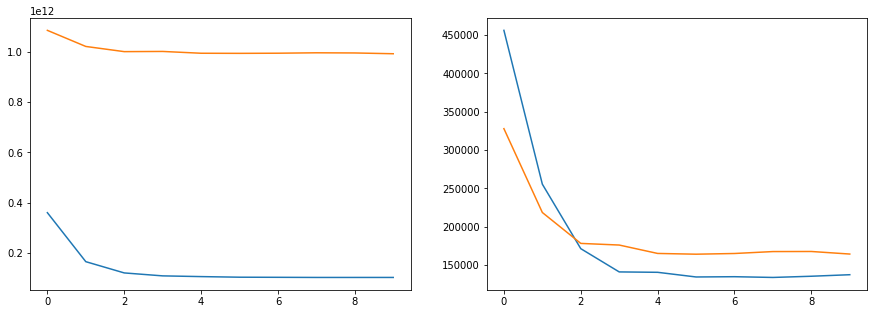

In [31]:
# Create model
regression_model = LinearRegression()

# Compile model
optimizer = optimizer=tf.keras.optimizers.SGD(1e-1)
loss = tf.keras.losses.MeanSquaredError()
metrics = tf.keras.metrics.MeanAbsoluteError()
regression_model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

# Train model
history = regression_model.fit(train_x_scaled, train_y, batch_size=dummy_x.shape[0], epochs=10, validation_split=0.2, verbose=0)

# Show result
train_loss = history.history["loss"]
train_mae = history.history["mean_absolute_error"]
val_loss = history.history["val_loss"]
val_mae = history.history["val_mean_absolute_error"]
print(f"train_mae: {train_mae[-1]:.2f} val_mae: {val_mae[-1]:.2f}")

# Plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.plot(val_loss)
plt.subplot(1, 2, 2)
plt.plot(train_mae)
plt.plot(val_mae)
plt.show()

### 4.4.2. K-fold cross validation

<img src="pics/k-fold_cross_validation.png" width="1100">

In [21]:
from sklearn.model_selection import KFold

In [24]:
# Test fit model on training data and evaluate using cross validation
class CrossValidation:
    def __init__(self, k_folds=10, scaler=None):
        # Initial properties
        self.k_folds = k_folds
        self.scaler = scaler
        self.scores = []
        
    def eval(self, model, x, y, **kwargs):
        # Initial model params
        model(x.astype(np.float32))
        # Save initial weights
        model.save_weights("init_weights/model")
        
        # Divide training set into k folds
        kf = KFold(n_splits=self.k_folds)
        self.scores = []
        for i, (train_index, val_index) in enumerate(kf.split(x)):
            # Load initial weights
            model.load_weights("init_weights/model")
            
            # Get validation fold
            val_x, val_y = x[val_index], y[val_index]
            
            # Get training fold
            train_x, train_y = x[train_index], y[train_index]
            
            # Normalization
            if scaler is not None:
                train_x = scaler.fit_transform(train_x)
                val_x = scaler.transform(val_x)
                
            # Train model on training set
            model.fit(train_x, train_y, **kwargs)
            
            # Evaluate model on validation set
            test_loss, test_mae = regression_model.evaluate(val_x, val_y, verbose=0)
            
            # Save evaluation result
            self.scores.append(test_mae)
        # Average all evaluation results
        mean_score = np.mean(self.scores)
        return mean_score

In [25]:
# Define model
regression_model = LinearRegression()
# Define loss function
loss = tf.keras.losses.MeanSquaredError()
# Define metrics function
metrics = tf.keras.metrics.MeanAbsoluteError()
# Define optimizer
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

# Compile model
regression_model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

scaler = StandardScaler()
evaluator = CrossValidation(k_folds=10, scaler=scaler)

score = evaluator.eval(regression_model, train_x, train_y, batch_size=16, epochs=10, verbose=0)
print(f"Validation errors: {evaluator.scores}")
print(f"Validation mean error: {score}")

Validation errors: [136880.75, 129183.17, 162921.73, 131706.48, 142458.66, 138309.98, 148212.67, 126787.33, 186139.55, 142249.1]
Validation mean error: 144484.9375


### 4.5. Evaluate on test set

In [28]:
# Define model
regression_model = LinearRegression()
# Define loss function
loss = tf.keras.losses.MeanSquaredError()
# Define metrics function
metrics = tf.keras.metrics.MeanAbsoluteError()
# Define optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

# Compile model
regression_model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

history = regression_model.fit(train_x_scaled, train_y, batch_size=16, epochs=10, verbose=0)

test_loss, test_mae = regression_model.evaluate(test_x_scaled, test_y, verbose=0)
print(f"Test error: {test_mae}")

Test error: 132446.453125


### 5. Implement Logistic regression on qualitative data
-

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 5.1. Load data

In [ ]:
# Load dataset
iris_data = pd.read_csv("./datasets/Iris/Iris.csv")

### 5.2. Prepare data

In [ ]:
# Remove Id column
data = iris_data.drop(columns=["Id"])
data.head()

In [ ]:
# One-hot encoding categorical columns
categorical_cols = ["Species"]

for col in categorical_cols:
    city_encoded = pd.get_dummies(data[col])
    city_encoded.columns = [col + "_" + str(_col) for _col in city_encoded.columns]
    data = pd.concat([data.drop(columns=col), city_encoded], axis=1)
data.head()

In [ ]:
# Seperate prediction/feature
data_x = data.iloc[:, :4]
data_y = data.iloc[:, 4:]
print(f"data_x: {data_x.shape}")
print(f"data_y: {data_y.shape}")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split train/test
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42, shuffle=True, stratify=data_y)
print(f"train_x: {train_x.shape}")
print(f"test_x: {test_x.shape}")
print(f"train_y: {train_y.shape}")
print(f"test_y: {test_y.shape}")

In [ ]:
from sklearn.preprocessing import MinMaxScaler

### 5.3. Prepare model

### 5.4. Fit and evaluate model

### 5.5. Evaluate on test set